<a href="https://colab.research.google.com/github/Martindelosrios/cosmic-kite/blob/main/Figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Let's install cosmic-kite and CAMB


In [1]:
!pip install git+https://github.com/Martindelosrios/cosmic-kite

  Cloning https://github.com/Martindelosrios/cosmic-kite to /tmp/pip-req-build-ydo_mpp9
  Running command git clone -q https://github.com/Martindelosrios/cosmic-kite /tmp/pip-req-build-ydo_mpp9
  Created wheel for cosmic-kite: filename=cosmic_kite-0.1-cp36-none-any.whl size=140513322 sha256=19e140f26346e48e5d503733fd6c612eaa7bcb9b5f6bd76060be88af8bd05cea
  Stored in directory: /tmp/pip-ephem-wheel-cache-50poa7_6/wheels/7c/cc/53/b4a807cfc36d1c9117a56810be5cce1250bf88c24f7ef69d63
Successfully built cosmic-kite


In [2]:
!pip install camb

     |████████████████████████████████| 1.6MB 5.2MB/s 
  Created wheel for camb: filename=camb-1.2.0-cp36-none-any.whl size=990098 sha256=7752020d8c7d94d6af68c75f49b68e60f5baea26fe849edbd983d16860b7baa1
  Stored in directory: /root/.cache/pip/wheels/a1/70/49/69af91f800f6afc795a0fffd59b488ad7ae273a7ff6b2a3ccd
Successfully built camb


In [3]:
from cosmic_kite import cosmic_kite
import matplotlib.pyplot as plt
import camb
import numpy as np
import h5py
import random

# Let's load the testset and the scalers


In [5]:
from pickle import dump
from pickle import load

scaler_x = load(open(cosmic_kite.data_path + '/scaler_x.pkl', 'rb')) # ps scaler
scaler_y = load(open(cosmic_kite.data_path + '/scaler_y.pkl', 'rb')) # pars scaler
testset  = h5py.File(cosmic_kite.data_path + '/testset.hdf5', 'r')   # Testset
x_testset = testset['x_testset'][()] # Power spectra
y_testset = testset['y_testset'][()] # Cosmological parameters

# Let's predict the parameters and the power spectra with cosmic_kite

In [6]:
ps_pred   = cosmic_kite.pars2ps(y_testset) # This function uses the pre-trained decoder
pars_pred = cosmic_kite.ps2pars(x_testset) # This function uses the pre-trained encoder

# Let's make some plots

## Figure 4 of xxxx.xxxx

In [ ]:
omb_chi = np.sqrt(np.mean((y_testset[:,0] - pars_pred[:,0])**2))
omc_chi = np.sqrt(np.mean((y_testset[:,1] - pars_pred[:,1])**2))
H0_chi  = np.sqrt(np.mean((y_testset[:,2] - pars_pred[:,2])**2))
n_chi   = np.sqrt(np.mean((y_testset[:,3] - pars_pred[:,3])**2))
tau_chi = np.sqrt(np.mean((y_testset[:,4] - pars_pred[:,4])**2))
As_chi  = np.sqrt(np.mean((y_testset[:,5] - pars_pred[:,5])**2))

In [ ]:
omb_prec = np.mean(np.abs(y_testset[:,0] - pars_pred[:,0])/y_testset[:,0])
omc_prec = np.mean(np.abs(y_testset[:,1] - pars_pred[:,1])/y_testset[:,1])
H0_prec  = np.mean(np.abs(y_testset[:,2] - pars_pred[:,2])/y_testset[:,2])
n_prec   = np.mean(np.abs(y_testset[:,3] - pars_pred[:,3])/y_testset[:,3])
tau_prec = np.mean(np.abs(y_testset[:,4] - pars_pred[:,4])/y_testset[:,4])
As_prec  = np.mean(np.abs(y_testset[:,5] - pars_pred[:,5])/y_testset[:,5])

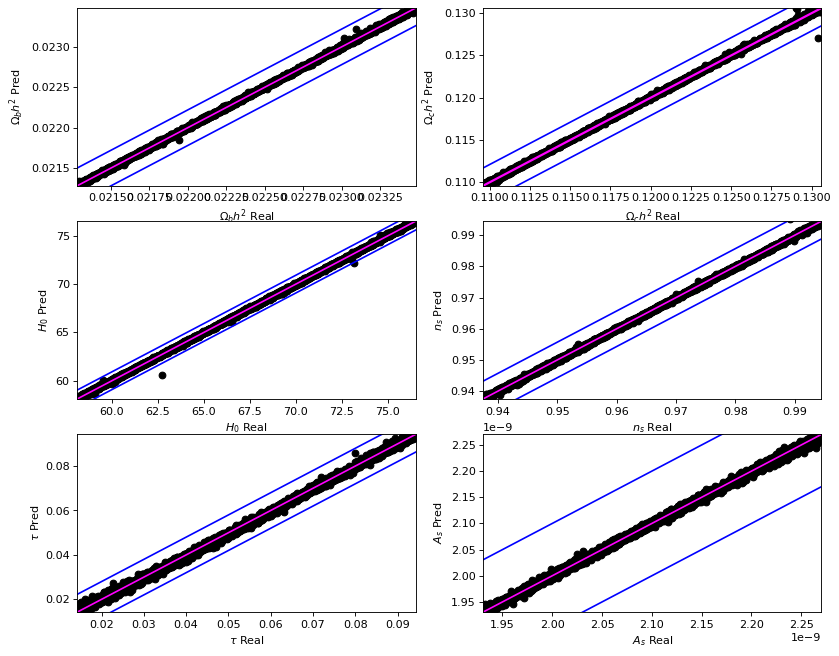

In [ ]:
fig=plt.figure(figsize=(12, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(3,2,1)

ind = np.argmax(np.abs(y_testset[:,0] - pars_pred[:,0]))
plt.scatter(y_testset[:,0],  pars_pred[:,0], color = 'black')
x = np.linspace(np.min(y_testset[:,0]), np.max(y_testset[:,0]), 100)
plt.plot(x, x, color = 'magenta')
plt.plot(x, (x+0.00022), color = 'blue')
plt.plot(x, (x-0.00022), color = 'blue')
plt.xlim(np.min(y_testset[:,0]), np.max(y_testset[:,0]))
plt.ylim(np.min(y_testset[:,0]), np.max(y_testset[:,0]))
plt.xlabel(r'$\Omega_{b}h^{2}$ Real')
plt.ylabel(r'$\Omega_{b}h^{2}$ Pred')


plt.subplot(3,2,2)

ind = np.argmax(np.abs(y_testset[:,1]- pars_pred[:,1]))
plt.scatter(y_testset[:,1], pars_pred[:,1], color = 'black')
x = np.linspace(np.min(y_testset[:,1]), np.max(y_testset[:,1]), 100)
plt.plot(x, x, color = 'magenta', linewidth = 2)
plt.plot(x, (x+0.0021), color = 'blue')
plt.plot(x, (x-0.0021), color = 'blue')
plt.xlim(np.min(y_testset[:,1]), np.max(y_testset[:,1]))
plt.ylim(np.min(y_testset[:,1]), np.max(y_testset[:,1]))
plt.xlabel(r'$\Omega_{c}h^{2}$ Real')
plt.ylabel(r'$\Omega_{c}h^{2}$ Pred')


plt.subplot(3,2,3)

ind = np.argmax(np.abs(y_testset[:,2]- pars_pred[:,2]))
plt.scatter(y_testset[:,2], pars_pred[:,2], color = 'black')
x = np.linspace(np.min(y_testset[:,2]), np.max(y_testset[:,2]), 100)
plt.plot(x, x, color = 'magenta')
plt.plot(x, (x+0.92), color = 'blue')
plt.plot(x, (x-0.92), color = 'blue')
plt.xlim(np.min(y_testset[:,2]), np.max(y_testset[:,2]))
plt.ylim(np.min(y_testset[:,2]), np.max(y_testset[:,2]))
plt.xlabel(r'$H_{0}$ Real')
plt.ylabel(r'$H_{0}$ Pred')

plt.subplot(3,2,4)

ind = np.argmax(np.abs(y_testset[:,3]- pars_pred[:,3]))
plt.scatter(y_testset[:,3], pars_pred[:,3], color = 'black')
x = np.linspace(np.min(y_testset[:,3]), np.max(y_testset[:,3]), 100)
plt.plot(x, x, color = 'magenta')
plt.plot(x, (x+0.0057), color = 'blue')
plt.plot(x, (x-0.0057), color = 'blue')
plt.xlim(np.min(y_testset[:,3]), np.max(y_testset[:,3]))
plt.ylim(np.min(y_testset[:,3]), np.max(y_testset[:,3]))
plt.xlabel(r'$n_{s}$ Real')
plt.ylabel(r'$n_{s}$ Pred')

plt.subplot(3,2,5)

ind = np.argmax(np.abs(y_testset[:,4]- pars_pred[:,4]))
plt.scatter(y_testset[:,4], pars_pred[:,4], color = 'black')
x = np.linspace(np.min(y_testset[:,4]), np.max(y_testset[:,4]), 100)
plt.plot(x, x, color = 'magenta')
plt.plot(x, (x+0.008), color = 'blue')
plt.plot(x, (x-0.008), color = 'blue')
plt.xlim(np.min(y_testset[:,4]), np.max(y_testset[:,4]))
plt.ylim(np.min(y_testset[:,4]), np.max(y_testset[:,4]))
plt.xlabel(r'$\tau$ Real')
plt.ylabel(r'$\tau$ Pred')

plt.subplot(3,2,6)

ind = np.argmax(np.abs(y_testset[:,5]- pars_pred[:,5]))
plt.scatter(y_testset[:,5], pars_pred[:,5], color = 'black')
x = np.linspace(np.min(y_testset[:,5]), np.max(y_testset[:,5]), 100)
plt.plot(x, x, color = 'magenta')
plt.plot(x, (x+1e-10), color = 'blue')
plt.plot(x, (x-1e-10), color = 'blue')
plt.xlim(np.min(y_testset[:,5]), np.max(y_testset[:,5]))
plt.ylim(np.min(y_testset[:,5]), np.max(y_testset[:,5]))
plt.xlabel(r'$A_{s}$ Real')
plt.ylabel(r'$A_{s}$ Pred')

## Figure 5 of xxxx.xxxx

[(0.0, 50.0)]

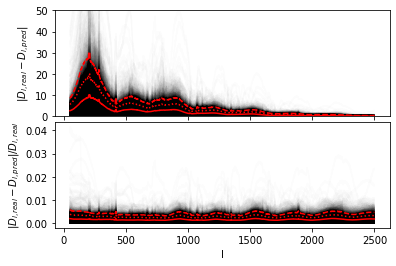

In [ ]:
cl_error = np.abs(x_testset - ps_pred)
cl_por   = np.abs((x_testset - ps_pred)/x_testset)

cl_error_mean = np.mean(cl_error, axis = 0)
cl_error_sd   = np.std(cl_error, axis = 0)

cl_por_mean = np.mean(cl_por, axis = 0)
cl_por_sd   = np.std(cl_por, axis = 0)

l = np.arange(50, 2500)

fig, axs = plt.subplots(2, 1, sharex=True, gridspec_kw={'hspace': 0.05, 'wspace': 0.})

for i in range(len(y_testset) - 1):
  ind = i

  axs[0].plot(l , np.abs(x_testset[ind,:] - ps_pred[ind,:]), color = 'black', alpha = 0.01)
  axs[0].set(ylabel = r'$|D_{l,real} - D_{l, pred}|$')

  axs[1].plot(l, np.abs(x_testset[ind,:] - ps_pred[ind,:])/x_testset[ind,], color = 'black', alpha = 0.01)
  axs[1].set(ylabel = r'$|D_{l,real} - D_{l, pred}|/D_{l,real}$', xlabel = 'l')

axs[0].plot(l, cl_error_mean, color = 'red')
axs[1].plot(l, cl_por_mean, color = 'red')

axs[0].plot(l, cl_error_mean + cl_error_sd, color = 'red', linestyle = ':')
axs[1].plot(l, cl_por_mean + cl_por_sd, color = 'red', linestyle = ':')

axs[0].plot(l, cl_error_mean + 2*cl_error_sd, color = 'red', linestyle = '--')
axs[1].plot(l, cl_por_mean + 2*cl_por_sd, color = 'red', linestyle = '--')

axs[0].set(ylim=(0,50))
axs[1].set(ylim=(0,0.02))

In [ ]:
# Worst multipole prediction for all the testset
np.max(cl_por)*100

4.168038711526128

## Figure 6

In [ ]:
lmin = 50
lmax = 2500 

# Let's create a fiducial planck spectra
H0_true  = 67.32117
omb_true = 0.0223828
omc_true = 0.1201075
n_true   = 0.9660499
tau_true = 0.05430842
As_true  = 2.100549e-09
at_true  = 1e9*As_true*np.exp(-2*tau_true)

H0_sigma  = 0.92
omb_sigma = 0.00022
omc_sigma = 0.0021
n_sigma   = 0.0057
tau_sigma = 0.008
As_sigma  = 0.034e-9
at_sigma  = 0.014


pars = camb.CAMBparams()
pars.set_cosmology(H0 = H0_true, ombh2 = omb_true, omch2 = omc_true, tau = tau_true)
pars.InitPower.set_params(As = As_true, ns = n_true)
results  = camb.get_results(pars)
powers   = results.get_cmb_power_spectra(pars, CMB_unit='muK')
fiducial = powers['total'][lmin:lmax,0]

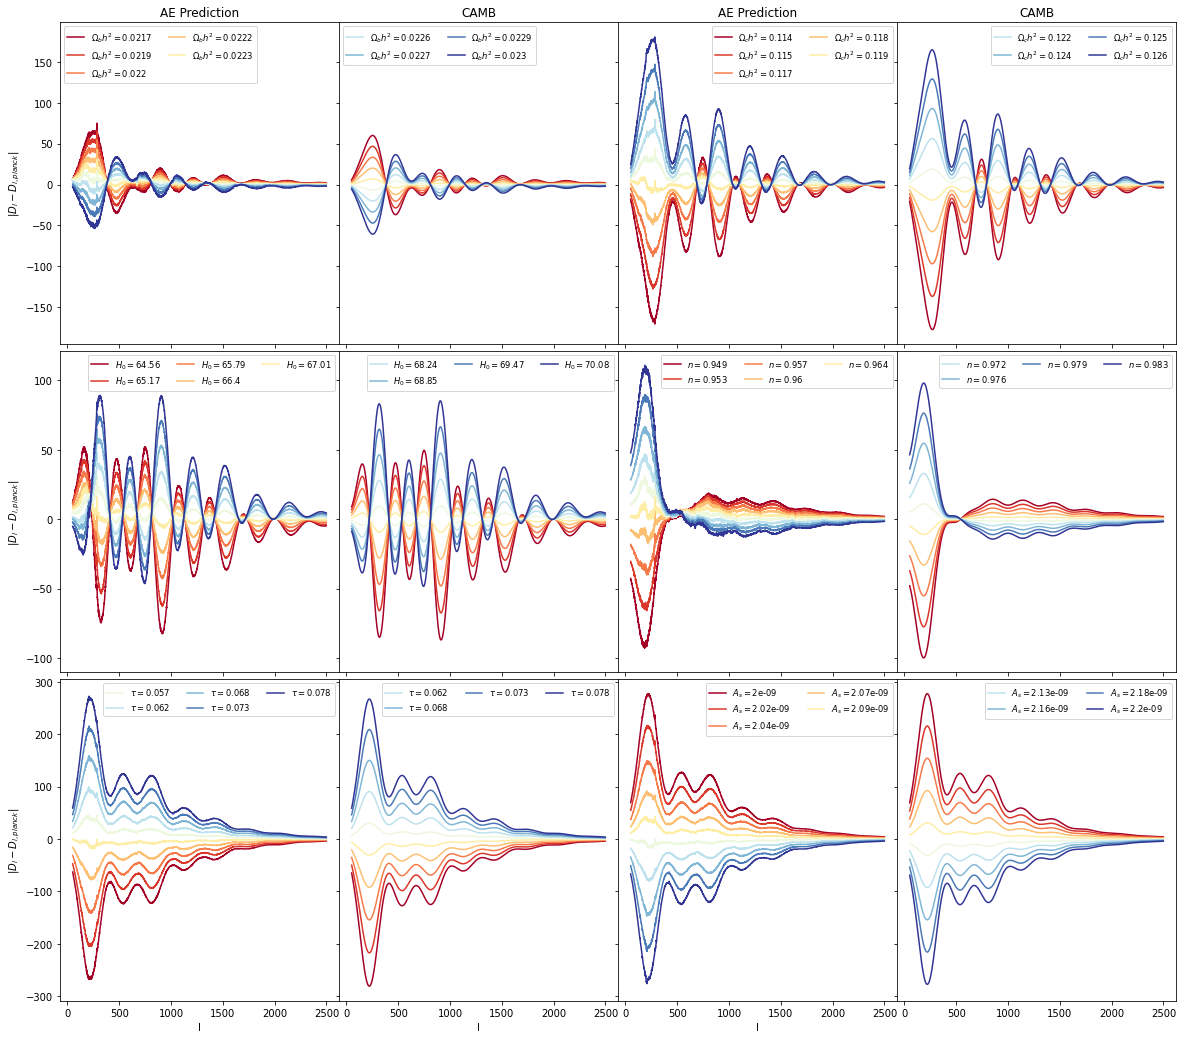

In [ ]:
l = np.arange(lmin, lmax)
i = 9
n = 10

cm = plt.cm.get_cmap('RdYlBu')
fig, axs = plt.subplots(3, 4, sharex = 'col', sharey = 'row', gridspec_kw = {'wspace': 0., 'hspace':0.02}, figsize=(20, 18))
plt.set_cmap(cm)

axs[0,0].set(ylabel = r'$|D_{l} - D_{l, planck}|$', title = 'AE Prediction')
axs[1,0].set(ylabel = r'$|D_{l} - D_{l, planck}|$')
axs[2,0].set(ylabel = r'$|D_{l} - D_{l, planck}|$', xlabel = 'l')
axs[2,1].set(xlabel = 'l')
axs[2,2].set(xlabel = 'l')
axs[0,1].set(title = 'CAMB')
axs[0,2].set(title = 'AE Prediction')
axs[0,3].set(title = 'CAMB')

for i in range(n):
  # OMB
  omb = omb_true - 3*omb_sigma + 6*omb_sigma*i/(n-1)
  col = (omb - omb_true + 3*omb_sigma)/(6*omb_sigma)

  params = np.array([omb, omc_true, H0_true, n_true, tau_true, As_true]).reshape(1,-1)
  ck_pred = cosmic_kite.pars2ps(params)[0]
  if (i < 5):
    axs[0,0].plot(l,(fiducial - ck_pred), c = cm(col), label = r'$\Omega_{b}h^{2} = $' + str(round(omb, 4)))
  else:
    axs[0,0].plot(l,(fiducial - ck_pred), c = cm(col))

  pars.set_cosmology(H0 = H0_true, ombh2 = omb, omch2 = omc_true, tau = tau_true)
  pars.InitPower.set_params(As = As_true, ns = n_true)
  results = camb.get_results(pars)
  powers  = results.get_cmb_power_spectra(pars, CMB_unit='muK')
  true_cl = powers['total'][lmin:lmax,0]
  if (i > 5):
    axs[0,1].plot(l,(fiducial - true_cl), c = cm(col), label = r'$\Omega_{b}h^{2} = $' + str(round(omb, 4)))
  else: 
    axs[0,1].plot(l,(fiducial - true_cl), c = cm(col))

  # OMC
  omc = omc_true - 3*omc_sigma + 6*omc_sigma*i/(n-1)
  col = (omc - omc_true + 3*omc_sigma)/(6*omc_sigma)

  params = np.array([omb_true, omc, H0_true, n_true, tau_true, As_true]).reshape(1,-1)
  ck_pred = cosmic_kite.pars2ps(params)[0]
  if (i < 5):
    axs[0,2].plot(l,(fiducial - ck_pred), c = cm(col), label = r'$\Omega_{c}h^{2} = $' + str(round(omc, 3)))
  else:
    axs[0,2].plot(l,(fiducial - ck_pred), c = cm(col))

  pars.set_cosmology(H0 = H0_true, ombh2 = omb_true, omch2 = omc, tau = tau_true)
  pars.InitPower.set_params(As = As_true, ns = n_true)
  results = camb.get_results(pars)
  powers  = results.get_cmb_power_spectra(pars, CMB_unit='muK')
  true_cl = powers['total'][lmin:lmax,0]
  if (i > 5):
    axs[0,3].plot(l,(fiducial - true_cl), c = cm(col), label = r'$\Omega_{c}h^{2} = $' + str(round(omc, 3)))
  else:
    axs[0,3].plot(l,(fiducial - true_cl), c = cm(col))

  # H0
  H0  = H0_true - 3*H0_sigma + 6*H0_sigma*i/(n-1)
  col = (H0 - H0_true + 3*H0_sigma)/(6*H0_sigma)

  params = np.array([omb_true, omc_true, H0, n_true, tau_true, As_true]).reshape(1,-1)
  ck_pred = cosmic_kite.pars2ps(params)[0]
  if (i < 5):
    axs[1,0].plot(l,(fiducial - ck_pred), c = cm(col), label = r'$H_{0} = $' + str(round(H0, 2)))
  else:
    axs[1,0].plot(l,(fiducial - ck_pred), c = cm(col))

  pars.set_cosmology(H0 = H0, ombh2 = omb_true, omch2 = omc_true, tau = tau_true)
  pars.InitPower.set_params(As = As_true, ns = n_true)
  results = camb.get_results(pars)
  powers  = results.get_cmb_power_spectra(pars, CMB_unit='muK')
  true_cl = powers['total'][lmin:lmax,0]
  if (i > 5):
    axs[1,1].plot(l,(fiducial - true_cl), c = cm(col), label = r'$H_{0} = $' + str(round(H0, 2)))
  else:
    axs[1,1].plot(l,(fiducial - true_cl), c = cm(col))

  # n
  n0  = n_true - 3*n_sigma + 6*n_sigma*i/(n-1)
  col = (n0 - n_true + 3*n_sigma)/(6*n_sigma)

  params = np.array([omb_true, omc_true, H0_true, n0, tau_true, As_true]).reshape(1,-1)
  ck_pred = cosmic_kite.pars2ps(params)[0]
  if (i < 5):
    axs[1,2].plot(l,(fiducial - ck_pred), c = cm(col), label = r'$n = $' + str(round(n0, 3)))
  else:
    axs[1,2].plot(l,(fiducial - ck_pred), c = cm(col))

  pars.set_cosmology(H0 = H0_true, ombh2 = omb_true, omch2 = omc_true, tau = tau_true)
  pars.InitPower.set_params(As = As_true, ns = n0)
  results = camb.get_results(pars)
  powers  = results.get_cmb_power_spectra(pars, CMB_unit='muK')
  true_cl = powers['total'][lmin:lmax,0]
  if (i > 5):
    axs[1,3].plot(l,(fiducial - true_cl), c = cm(col), label = r'$n = $' + str(round(n0, 3)))
  else:
    axs[1,3].plot(l,(fiducial - true_cl), c = cm(col))

  # tau
  tau = tau_true - 3*tau_sigma + 6*tau_sigma*i/(n-1)
  col = (tau - tau_true + 3*tau_sigma)/(6*tau_sigma)

  params = np.array([omb_true, omc_true, H0_true, n_true, tau, As_true]).reshape(1,-1)
  ck_pred = cosmic_kite.pars2ps(params)[0]
  if (i < 5):
    axs[2,0].plot(l,(fiducial - ck_pred), c = cm(col))
  else:
    axs[2,0].plot(l,(fiducial - ck_pred), c = cm(col), label = r'$\tau = $' + str(round(tau, 3)))

  pars.set_cosmology(H0 = H0_true, ombh2 = omb_true, omch2 = omc_true, tau = tau)
  pars.InitPower.set_params(As = As_true, ns = n_true)
  results = camb.get_results(pars)
  powers  = results.get_cmb_power_spectra(pars, CMB_unit='muK')
  true_cl = powers['total'][lmin:lmax,0]
  if (i > 5):
    axs[2,1].plot(l,(fiducial - true_cl), c = cm(col), label = r'$\tau = $' + str(round(tau, 3)))
  else:
    axs[2,1].plot(l,(fiducial - true_cl), c = cm(col))

  # As
  As  = As_true - 3*As_sigma + 6*As_sigma*i/(n-1)
  col = (As - As_true + 3*As_sigma)/(6*As_sigma)

  params = np.array([omb_true, omc_true, H0_true, n_true, tau_true, As]).reshape(1,-1)
  ck_pred = cosmic_kite.pars2ps(params)[0]
  if (i < 5):
    axs[2,2].plot(l,(fiducial - ck_pred), c = cm(col), label = r'$A_{s} = $' + str(round(As, 11)))
  else:
    axs[2,2].plot(l,(fiducial - ck_pred), c = cm(col))

  pars.set_cosmology(H0 = H0_true, ombh2 = omb_true, omch2 = omc_true, tau = tau_true)
  pars.InitPower.set_params(As = As, ns = n_true)
  results = camb.get_results(pars)
  powers  = results.get_cmb_power_spectra(pars, CMB_unit='muK')
  true_cl = powers['total'][lmin:lmax,0]
  if (i > 5):
    axs[2,3].plot(l,(fiducial - true_cl), c = cm(col), label = r'$A_{s} = $' + str(round(As, 11)))
  else:
    axs[2,3].plot(l,(fiducial - true_cl), c = cm(col))

axs[0,0].legend(ncol = 2, loc = 2, fontsize='small')
axs[0,1].legend(ncol = 2, loc = 2, fontsize='small')
axs[0,2].legend(ncol = 2, loc = 1, fontsize='small')
axs[0,3].legend(ncol = 2, loc = 1, fontsize='small')
axs[1,0].legend(ncol = 3, loc = 1, fontsize='small')
axs[1,1].legend(ncol = 3, loc = 1, fontsize='small')
axs[1,2].legend(ncol = 3, loc = 1, fontsize='small')
axs[1,3].legend(ncol = 3, loc = 1, fontsize='small')
axs[2,0].legend(ncol = 3, loc = 1, fontsize='small')
axs[2,1].legend(ncol = 3, loc = 1, fontsize='small')
axs[2,2].legend(ncol = 2, loc = 1, fontsize='small')
axs[2,3].legend(ncol = 2, loc = 1, fontsize='small')

## Figure 7

In [ ]:
# Define log lik
def log_lik(true, pred):

  l    = np.arange(lmin, lmax)
  aux0 = np.log(true/pred)
  aux1 = (pred/true)
  aux  = (2*l + 1)*(aux0 + aux1 - 1)
  val  = -1.*np.sum(aux)
  return val

In [ ]:
like    = []
like_ck = []

nobs = 1000
params = np.random.normal(loc = [omb_true, omc_true, H0_true, n_true, tau_true, As_true], scale = [omb_sigma, omc_sigma, H0_sigma, n_sigma, tau_sigma, As_sigma], 
                          size = (nobs, 6))

for j in range(nobs):
  if (j%50 == 0): print(j)
  H0    = params[j, 2]
  ombh2 = params[j, 0]
  omch2 = params[j, 1]
  n     = params[j, 3] 
  tau   = params[j, 4] 
  As    = params[j, 5] 

  # CAMB
  pars = camb.CAMBparams()
  pars.set_cosmology(H0 = H0, ombh2 = ombh2, omch2 = omch2, tau = tau)
  pars.InitPower.set_params(As = As, ns = n)
  results  = camb.get_results(pars)
  powers   = results.get_cmb_power_spectra(pars, CMB_unit='muK')
  camb_ps  = powers['total'][lmin:lmax,0]

  # Cosmic-kite
  params0 = np.array([ombh2, omch2, H0, n, tau, As]).reshape(1,-1)
  ck_ps   = cosmic_kite.pars2ps(params0)[0]

  like.append(log_lik(fiducial, camb_ps))
  like_ck.append(log_lik(fiducial, ck_ps))

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


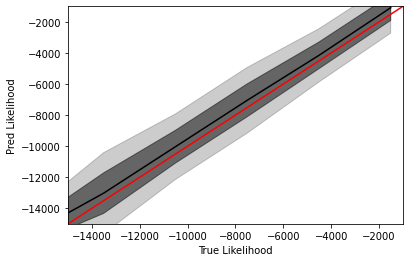

In [ ]:
from scipy.stats import binned_statistic

lik_mean, edges, x = binned_statistic(like, like_ck, statistic='mean', bins = np.linspace(np.min(like), np.max(like),10))
lik_sd, edges, x   = binned_statistic(like, like_ck, statistic='std', bins = np.linspace(np.min(like), np.max(like),10))

x = np.zeros(9)
for i in range(9):
  x[i] = edges[i]+ (edges[1] - edges[0])/2

plt.plot(x, lik_mean, c = 'black')
plt.fill_between(x, lik_mean - lik_sd, lik_mean + lik_sd, color = (0,0,0,0.5))
plt.fill_between(x, lik_mean - 2*lik_sd, lik_mean + 2*lik_sd, color = (0,0,0,0.2))
x = np.linspace(np.min(like), np.max(like), 100)
plt.plot(x, x, color = 'red')
plt.xlabel('True Likelihood')
plt.ylabel('Pred Likelihood')
plt.xlim((-1.5e4,-1e3))
plt.ylim((-1.5e4,-1e3))

## Figure 8 (half of it)

### First we need to install emcee and pygtc

In [ ]:
!pip install emcee

     |████████████████████████████████| 51kB 2.7MB/s 


In [ ]:
!pip install pygtc

     |████████████████████████████████| 6.2MB 4.4MB/s 


In [ ]:
import emcee
import pygtc

### Let's run some chains

In [ ]:
lmin = 50
lmax = 2500 

# Let's create a fiducial planck spectra
H0_true  = 67.32117
omb_true = 0.0223828
omc_true = 0.1201075
n_true   = 0.9660499
tau_true = 0.05430842
As_true  = 2.100549e-09
at_true  = 1e9*As_true*np.exp(-2*tau_true)

H0_sigma  = 0.92
omb_sigma = 0.00022
omc_sigma = 0.0021
n_sigma   = 0.0057
tau_sigma = 0.008
As_sigma  = 0.034e-9

pars = camb.CAMBparams()
pars.set_cosmology(H0 = H0_true, ombh2 = omb_true, omch2 = omc_true, tau = tau_true)
pars.InitPower.set_params(As = As_true, ns = n_true)
results  = camb.get_results(pars)
powers   = results.get_cmb_power_spectra(pars, CMB_unit='muK')
fiducial = powers['total'][lmin:lmax,0]

In [ ]:
def forward_model(x, true_cl):
  try:
    params  = np.array([x[1], x[2], x[0], x[3], x[4], x[5]]).reshape(1,-1)
    ck_pred = cosmic_kite.pars2ps(params)[0]
    val     = log_lik(true_cl, ck_pred)
  except:
    val = -9999999

  return val

In [ ]:
# Define log lik
def log_lik(true, pred):

  l    = np.arange(lmin, lmax)
  aux0 = np.log(true/pred)
  aux1 = (pred/true)
  aux  = (2*l + 1)*(aux0 + aux1 - 1)
  val  = -1.*np.sum(aux)
  return val

In [ ]:
nwalkers = 32
ndim     = 6
p0       = np.random.normal(loc = [H0_true, omb_true, omc_true, n_true, tau_true, As_true], scale = [H0_sigma, omb_sigma, omc_sigma, n_sigma, tau_sigma, As_sigma], size = (nwalkers, ndim))

In [ ]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, forward_model, args=[fiducial])
state   = sampler.run_mcmc(p0, 100, progress = True)
sampler.reset()

100%|██████████| 100/100 [01:59<00:00,  1.19s/it]


In [ ]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, forward_model, args=[fiducial])
state   = sampler.run_mcmc(state, 1000, progress = True)

100%|██████████| 1000/1000 [20:16<00:00,  1.22s/it]


In [ ]:
max_n = 20000

# We'll track how the average autocorrelation time estimate changes
index = 0
autocorr = np.empty(max_n)

# This will be useful to testing convergence
old_tau = np.inf

# Now we'll sample for up to max_n steps
for sample in sampler.sample(state, iterations=max_n, progress=True):
    # Only check convergence every 100 steps
    if sampler.iteration % 100:
        continue

    # Compute the autocorrelation time so far
    # Using tol=0 means that we'll always get an estimate even
    # if it isn't trustworthy
    tau = sampler.get_autocorr_time(tol=0)
    autocorr[index] = np.mean(tau)
    index += 1

    # Check convergence
    converged = np.all(tau * 100 < sampler.iteration)
    converged &= np.all(np.abs(old_tau - tau) / tau < 0.01)
    if converged:
        break
    old_tau = tau

 34%|███▍      | 6900/20000 [2:19:52<4:25:32,  1.22s/it]


In [ ]:
ck_samples = sampler.get_chain(thin=15, flat=True)
ck_samples.shape

(14720, 6)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


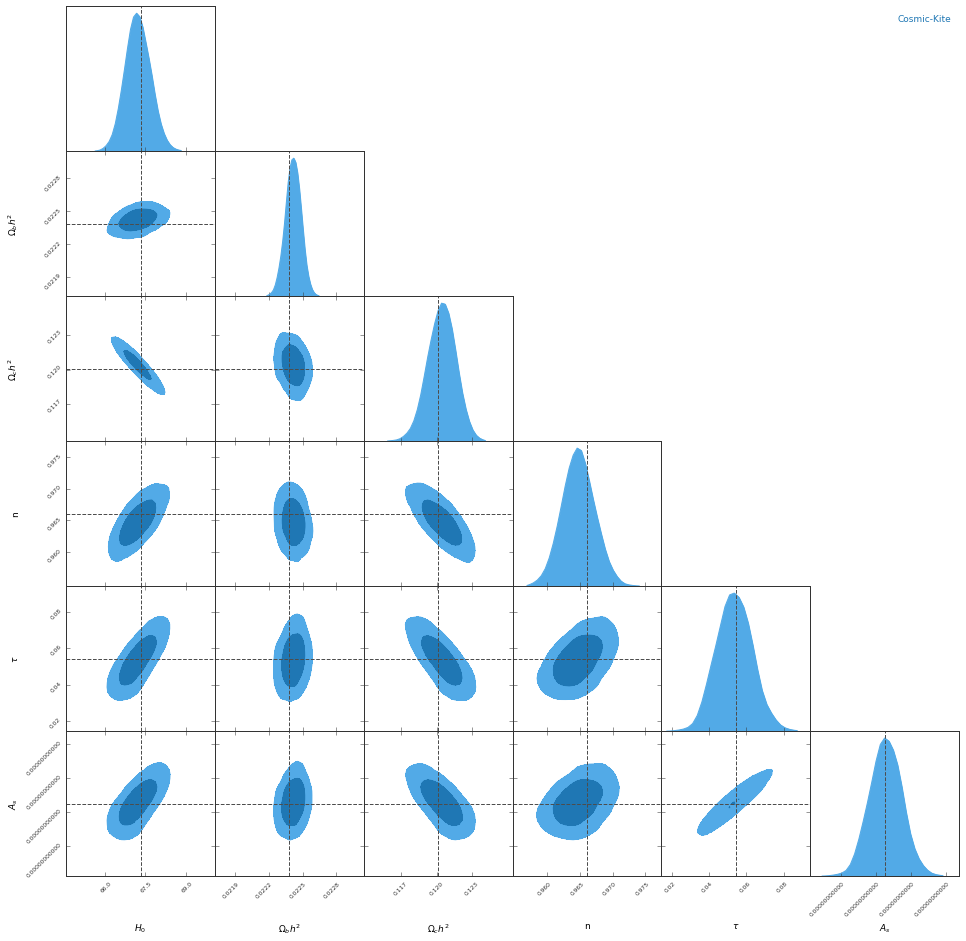

In [ ]:
par_range = ((H0_true - 3*H0_sigma, H0_true + 3*H0_sigma), (omb_true - 3*omb_sigma, omb_true + 3*omb_sigma), 
             (omc_true - 3*omc_sigma, omc_true + 3*omc_sigma), (n_true - 2*n_sigma, n_true + 2*n_sigma), 
             (tau_true - 5*tau_sigma, tau_true + 5*tau_sigma), (As_true - 5*As_sigma, As_true + 5*As_sigma))
labels = [r'$H_{0}$', r'$\Omega_{b}h^{2}$', r'$\Omega_{c}h^{2}$', 'n', r'$\tau$', r'$A_{s}$']
GTC = pygtc.plotGTC(chains=[ck_samples],
                    truths = [(H0_true, omb_true, omc_true, n_true, tau_true, As_true)],
                    paramNames = labels,
                    chainLabels = ["Cosmic-Kite"],
                    paramRanges = par_range,
                    figureSize = 16)

## Profiling

In [7]:
from time import time

# Let's create a fiducial planck spectra
H0_true  = 67.32117
omb_true = 0.0223828
omc_true = 0.1201075
n_true   = 0.9660499
tau_true = 0.05430842
As_true  = 2.100549e-09

H0_sigma  = 0.92
omb_sigma = 0.00022
omc_sigma = 0.0021
n_sigma   = 0.0057
tau_sigma = 0.008
As_sigma  = 0.034e-9

# Let's choose 1000 random cosmologies around planck values
nran   = 1000
params = np.random.normal(loc = [omb_true, omc_true, H0_true, n_true, tau_true, As_true], scale = [omb_sigma, omc_sigma, H0_sigma, n_sigma, tau_sigma, As_sigma],size = (nran, 6))

In [8]:
# Let's measure the time to compute 1000 spectra with CAMB
pars = camb.CAMBparams()

camb_start = time()

for i in range(nran):
  if (i%50 == 0): print(i)
  pars.set_cosmology(H0 = params[i,2], ombh2 = params[i,0], omch2 = params[i,1], tau = params[i,4])
  pars.InitPower.set_params(As = params[i,5], ns = params[i,3])
  results = camb.get_results(pars)
  powers  = results.get_cmb_power_spectra(pars, CMB_unit='muK')

camb_end = time()
print(f'CAMB took {camb_end - camb_start} seconds to compute the power spectra for ', nran, ' random cosmologies!')

CAMB took 12169.168427228928 seconds to compute the power spectra for  1000  random cosmologies!


In [11]:
# Let's measure the time to compute 1000 spectra with Cosmic-kite in a loop

ck_start = time()
for i in range(nran):
  if (i%50 == 0): print(i)
  ps = cosmic_kite.pars2ps(params[i,:].reshape(1, -1))

ck_end = time()
print(f'Cosmic-kite took {ck_end - ck_start} seconds to compute the power spectra for ',nran,' random cosmologies in loop mode!')

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
Cosmic-kite took 37.74350595474243 seconds to compute the power spectra for  1000  random cosmologies in loop mode!


In [12]:
# Let's measure the time to compute 1000 spectra with Cosmic-kite

ck_start = time()

ps = cosmic_kite.pars2ps(params)

ck_end = time()
print(f'Cosmic-kite took {ck_end - ck_start} seconds to compute the power spectra for ',nran,' random cosmologies!')


Cosmic-kite took 0.24040675163269043 seconds to compute the power spectra for  1000  random cosmologies!
